# K-Nearest Neighbours

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

import helper

In [2]:

X_train, X_test, y_train, y_test = helper.get_test_train_split()


In [3]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsRegressor()

In [4]:

y_pred = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))

print(f'{rmse = :.2f}') 


rmse = 84906934.72


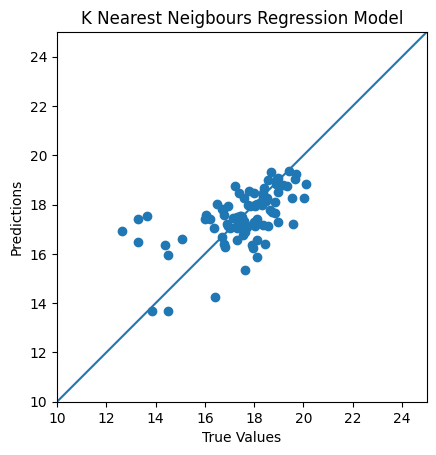

In [5]:
plt.scatter(y_test, y_pred)
plt.title('K Nearest Neigbours Regression Model')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,25])
plt.ylim([10,25])
_ = plt.plot([-100, 100], [-100, 100])

In [6]:
ratio = helper.revenue_exp(y_test) / helper.revenue_exp(y_pred)
print(ratio.describe())


for i in range(10,20):
    print(f'{y_test.iloc[i]:.2f} -> {y_pred[i]:.2f} -> {ratio.iloc[i]:.2f}')

count    93.000000
mean      1.856158
std       2.161924
min       0.013486
25%       0.730174
50%       1.145516
75%       2.008401
max      10.809404
Name: revenue, dtype: float64
19.17 -> 18.80 -> 1.44
17.62 -> 15.36 -> 9.55
16.80 -> 16.26 -> 1.72
18.35 -> 18.13 -> 1.25
16.50 -> 18.04 -> 0.21
19.68 -> 19.24 -> 1.56
17.29 -> 17.50 -> 0.81
18.95 -> 17.29 -> 5.26
18.37 -> 17.15 -> 3.37
19.43 -> 19.38 -> 1.05


1: rmse = 104613828.38
2: rmse = 88934488.06
3: rmse = 83963694.32
4: rmse = 86318957.56
5: rmse = 84906934.72
6: rmse = 84988717.74
7: rmse = 85748464.11
8: rmse = 86786556.42
9: rmse = 86987152.35
10: rmse = 86527447.92
11: rmse = 88368873.61
12: rmse = 88899175.04
13: rmse = 89387274.46
14: rmse = 89724880.10
15: rmse = 89724433.31
16: rmse = 90338607.28
17: rmse = 89984731.52
18: rmse = 90211319.63
19: rmse = 90258209.31
20: rmse = 90338821.26
[104613828.37748857, 88934488.06410341, 83963694.319346, 86318957.55914736, 84906934.72169286, 84988717.74243216, 85748464.10569017, 86786556.41534075, 86987152.35303752, 86527447.91857612, 88368873.60563071, 88899175.04175481, 89387274.45571734, 89724880.1044702, 89724433.30627497, 90338607.278185, 89984731.51963672, 90211319.63285808, 90258209.30545622, 90338821.26365185]


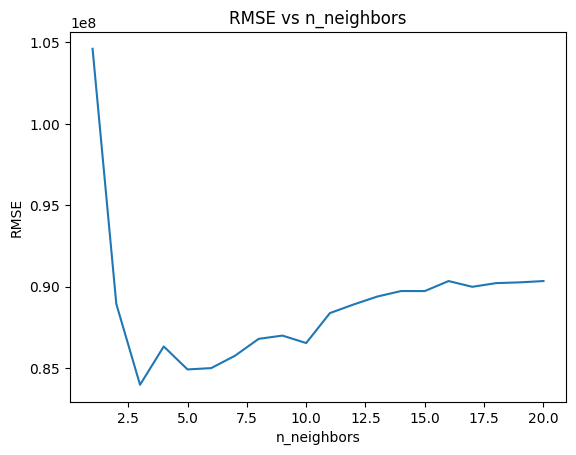

In [7]:
res = []
for i in range(20):
    knn = KNeighborsRegressor(n_neighbors=i+1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    rmse = np.sqrt(mean_squared_error(helper.revenue_exp(y_test), helper.revenue_exp(y_pred)))
    print(f'{i+1 }: {rmse = :.2f}')
    res.append(rmse)
print(res)
indexes = range(1,21)
# graph rmse vs n_neighbors

plt.plot(indexes, res)
plt.title('RMSE vs n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('RMSE')
plt.show()





